In [60]:
import pkufiber as pf 
import pkufiber.dsp.nonlinear_compensation as nl
import torch 
from torch.utils.data import DataLoader

dic = torch.load('/home/xiaoxinyu/pkufiber/experiments/metadbp_train40G_1ch/models/30.pth', map_location='cuda:0')
net = nl.MetaDBP(**dic['dbp_info'])
net.load_state_dict(dic['dbp_param'])
net.cuda()

path = '/home/xiaoxinyu/dataset/train.h5'
# path = '/home/xiaoxinyu/TorchFiber/dataset_A800/train.h5'
data = pf.data.FiberDataset(path=path, Nch=1, Rs=40, Pch=2,window_size=50000, strides=1, num_symb=50000, Tx_window=True)
dataloader = DataLoader(data, batch_size=1, shuffle=False, num_workers=0)

dataloaders = [] 

for pch in range(-3, 7):    
    data = pf.data.FiberDataset(path=path, Nch=1, Rs=40, Pch=pch, window_size=50000, strides=1, num_symb=50000, Tx_window=True)
    dataloaders.append(DataLoader(data, batch_size=1, shuffle=False, num_workers=0))

In [61]:
import sys, numpy as np, matplotlib.pyplot as plt
sys.path.append('../scripts')     # scripts 文件夹在上一级目录
from train_ldbp import test_model # type:ignore
metric, (z1, z2) = test_model(net, dataloader)

Q factor =  9.991467725577328


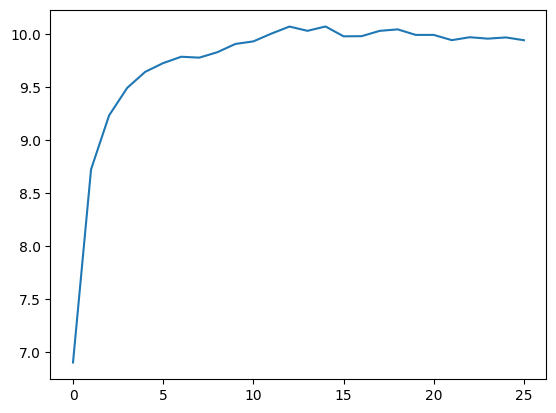

In [62]:
print('Q factor = ', metric['Qsq'])

plt.plot(metric['Qsq_path'])

array([<Axes: >, <Axes: >], dtype=object)

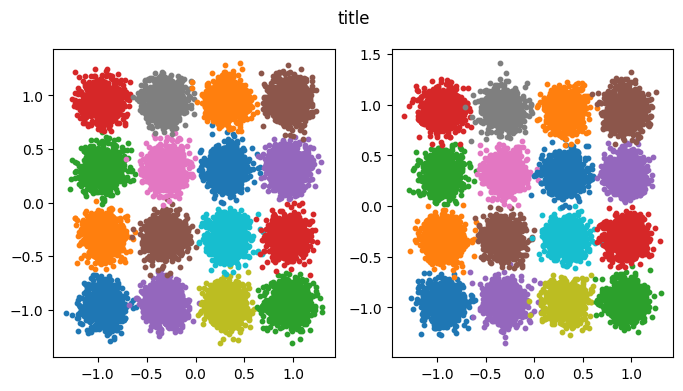

In [63]:
pf.show_symb(z1[10000:25000],z2[10000:25000])

In [64]:
Ps = range(-3, 7)
Qp = [test_model(net, dataloader)[0]['Qsq'] for dataloader in dataloaders]

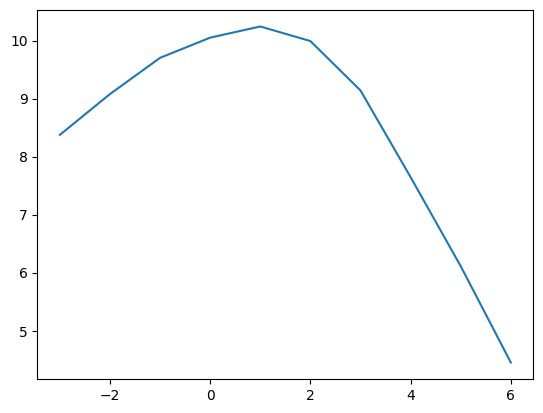

In [65]:
plt.plot(Ps, Qp)